# TDT4173: Machine Learning and Case-Based Reasoning - Assignment 3
### Author: Vittorio Triassi 

# Task 2.4 - Neural Network from scratch

A fully-connected neural network is able to solve the nonlinear XOR problem, but what is the minimal number of layers and neurons within these layers necessary? Back up your answer with an illustration of the network architecture and an explanation why you believe this is the correct network architecture. Subsequently, develop the functionality required for training this neural network based on the theory that we discussed earlier. As part of this you will need to derive functions for the gradients. Finally, train the network for the amount of rounds (epochs) that you feel appropriate and plot how the loss develops during training. Both the network architecture and graphical plot of error should be included in the report.

For the purpose of the following task, `numpy` and `matplotlib` were used. Let us start by importing them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For the following task, we are asked to solve the XOR problem by using a Neural Network (NN) created from scratch. A very common problem with NNs, is the need to increase the non-linearity to be able to generalize and consequently to correctly predict over specific datasets. In our case, we want to solve a basic but at the same time very effective problem, and to do so we start asking ourselves how many layers we need in our network. It turns out that in order to be able to predict hypotheses for the XOR problem, it is not possible to use just a single neuron. The reason is that we can not plot one line that is able to separate our data points in such a way that the predictions are correct. It seems clear then, that we need to increase the complexity of the function we want to predict and to achieve that we need a more complex architecture. The impacts that such a thing has on our network is the need to stack a hidden layer made up of at least two neurons. In our implementations, we can set the number of hidden neurons that is initially set equal to 2 but can be modified with any other value. In our task, we do not have a specific dataset but we would rather want to learn a function that predicts the XOR table. That is why the first step is the creation of our truth table (that is going to represent the training examples) with the respective true labels (the value for which the two input features are true or false)

In [2]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],[1],[1],[0]])

In [7]:
iterations = 20000
neurons = 2

Then, we carry on by defining the functions for the sigmoid, the derivative of the sigmoid, the forward and backpropagation.

In [4]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [5]:
class NeuralNetwork:
    def __init__(self, X, y, neurons):
        
        self.X, self.y = X, y
        
        self.W1 = np.random.rand(self.X.shape[1], neurons) 
        self.W2 = np.random.rand(neurons, 1) 
        
        self.prediction = np.zeros(self.y.shape)

    def forward(self):
      
        z1 = np.dot(self.X, self.W1)
        a1 = sigmoid(z1)
        z2 = np.dot(a1, self.W2)
        self.prediction = sigmoid(z2)

        return np.dot((self.y - self.prediction).T, (self.y - self.prediction))
      
    def backpropagation(self):

        n = self.X.shape[0] 
        learning_rate = 0.3
        
        d_Z2 = self.y - self.prediction
        d_Z1 = np.multiply(np.dot(self.W2, d_Z2.T).T, sigmoid_grad(np.dot(self.X, self.W1)))
        self.W2 += ((np.dot(sigmoid(np.dot(self.X, self.W1)).T, d_Z2)) / n) * (learning_rate)
        self.W1 += (np.dot(self.X.T, d_Z1) / n) * (learning_rate)

As far as parameters such as the learning rate and the number of iterations, several combinations were carried out. In the end, we obtained quite stable results when the traning went over $20000$ iterations with a learning rate equal to $0.3$. When trying to predict, we obtained the results shown below. As we can see, our configuration let us to predict with quite good performance. As regards to the **Loss function** and how this was minimized, we plot the number of iterations over the cost. In the plot below, it is quite clear that the function gets correctly minimized and converges towards zero updating properly the weights of the model. 

Classes: 
 [[0 1 1 0]]
Predictions :
 [[0.01843785 0.95232588 0.95232594 0.07880215]]


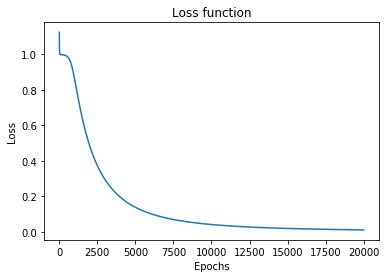

In [8]:
NN = NeuralNetwork(X, y, neurons)

J = np.zeros((iterations, 1))

for i in range(iterations):
    cost = NN.forward()
    NN.backpropagation()
    J[i] = cost

print("Classes: \n",  (y.T))
print("Predictions :\n", NN.prediction.T)

plt.figure()
plt.plot(J)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()